In [25]:
import pandas as pd 
import numpy as np 
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns 

In [26]:
field_df = pd.read_csv("MD_agric_exam-4313.csv")

In [27]:
field_df

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


In [28]:
# 1
len(field_df["Crop_type"].unique())

8

In [29]:
# 2
round_field = round(field_df[field_df["Crop_type"]=="wheat"]["Annual_yield"], 2)
round_field.max()

8.99

In [63]:
# 3
m = pd.DataFrame(field_df.groupby("Crop_type")["Pollution_level"].mean())
t = m[m["Pollution_level"]>0.2]
t

,Pollution_level
Crop_type,
cassava,0.327714
coffee,0.220615
maize,0.265101
potato,0.252135
tea,0.214799
wheat,0.223527


In [66]:
ñ = field_df[field_df["Crop_type"].isin(["cassava", "coffee", "maize", "potato", "tea", "wheat"])]["Rainfall"].sum()
ñ

941959.7

In [58]:
# 4
def temperature_range(field_df, id_1, id_2, id_3):
    """
    this function take three Field_ID and annd calculating there temperature range 

    Args:
        id_1, id_2, id_3 (int) : the Field_ID of the data 
    Return:
        calculate the diffrence between Max_temperature_C and Min_temperature_C 
        for each Field 
    """
    x = field_df[field_df["Field_ID"]==id_1]["Max_temperature_C"] - field_df[field_df["Field_ID"]==id_1]["Min_temperature_C"]
    y = field_df[field_df["Field_ID"]==id_2]["Max_temperature_C"] - field_df[field_df["Field_ID"]==id_2]["Min_temperature_C"]
    z = field_df[field_df["Field_ID"]==id_3]["Max_temperature_C"] - field_df[field_df["Field_ID"]==id_3]["Min_temperature_C"]

    return x, y, z



In [8]:
# 5
# What does the following code achieve?
a = field_df['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = field_df[field_df['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)
## prints the crop type (c) that corresponds to the minimum mean temperature observed across all crop types.

rice


In [9]:
# 6
total_plot_size = field_df[field_df["pH"] < 5.5]["Plot_size"].sum()
total_plot_size

1731.8999999999999

In [10]:
# 7
df = field_df[(field_df['Min_temperature_C']< -5) & ( field_df['Max_temperature_C'] > 30)]
df = pd.DataFrame(df)
len(df)

319

In [11]:
# 8
w = round(field_df[field_df["Plot_size"] > (field_df["Plot_size"].median())]["Rainfall"].std(), 2)
w

470.09

In [12]:
# 9
import pandas as pd

# Assuming data is your DataFrame containing 'Max_temperature_C' and 'Crop_type' columns

# Find the most common Max_temperature_C
most_common_temp = field_df['Max_temperature_C'].mode()[0]

# Find the least common Crop_type
least_common_crop = field_df['Crop_type'].value_counts().idxmin()

# Extract the first three digits of the most common Max_temperature_C
first_three_digits = str(most_common_temp)[:3]

# Extract the last three letters of the least common Crop_type
last_three_letters = least_common_crop[-3:]

# Concatenate the first three digits of the most common Max_temperature_C with the last three letters of the least common Crop_type
result = first_three_digits + last_three_letters

print(result)


30.ice


C:\Users\zakar\AppData\Local\Temp\ipykernel_3632\3367970846.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Elevation_Category', y='Annual_yield', data=field_df, palette='viridis')


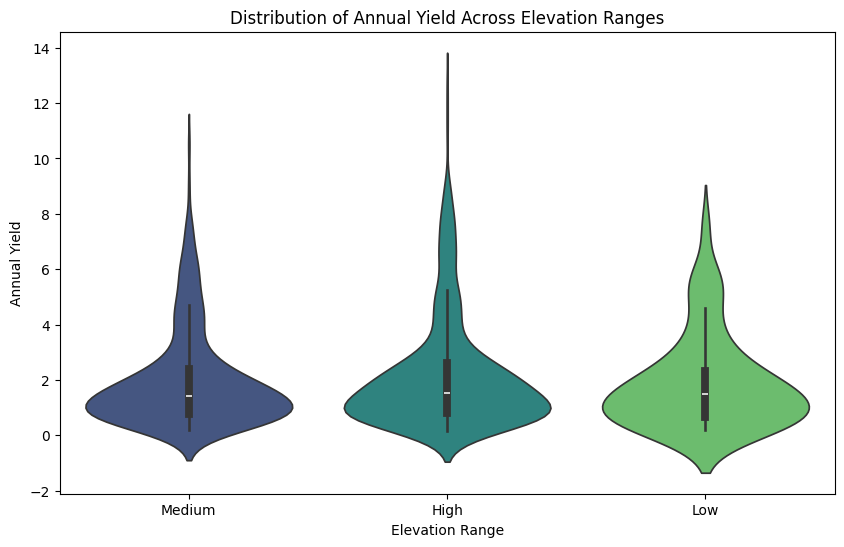

In [13]:
# 10 
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize 'Elevation' into ranges: Low, Medium, High
def categorize_elevation(elevation):
    if elevation < 300:
        return 'Low'
    elif 300 <= elevation <= 600:
        return 'Medium'
    else:
        return 'High'

# Apply categorization to create a new column 'Elevation_Category'
field_df['Elevation_Category'] = field_df['Elevation'].apply(categorize_elevation)

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=field_df, palette='viridis')
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()


In [14]:
# 11
unique = field_df["Crop_type"].unique()
unique
sum = 0
for x in unique:
    sum += len(x)
sum

42

In [15]:
# 12 
from scipy.stats import ttest_ind
import pandas as pd

# Assuming data is your DataFrame containing 'Annual_yield' and 'Crop_type' columns

# Filter data for 'coffee' and 'banana' crop types
coffee_yield = field_df[field_df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = field_df[field_df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_stat, p_val = ttest_ind(coffee_yield, banana_yield, equal_var=False)

# Print p-value rounded to three decimal places
print(round(p_val, 3))

0.598
